# Background

The supermarket chain Good Seed would like to explore whether Data Science can help them adhere to alcohol laws by making sure they do not sell alcohol to people underage. I am conducting the evaluation keeping the following in mind:
- The shops are equipped with cameras in the checkout area which are triggered when a person is buying alcohol
- Computer vision methods can be used to determine age of a person from a photo
- The task then is to build and evaluate a model for verifying people's age

## Initialization

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')

## EDA

In [3]:
labels.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
labels.shape

(7591, 2)

In [5]:
labels['real_age'].unique()

array([  4,  18,  80,  50,  17,  27,  24,  43,  26,  39,  51,   2,   1,
         6,   5,  40,  16,  29,  35,  25,  30,  65,  13,  28,  31,  10,
        34,  15,   8,  20,  19,  42,  23,  58,  44,   7,  21,  14,  48,
        45,  37,  22,  59,  53,   9,  41,  32,  60,  38,  54,  49,  36,
        11,  70,  52,  33,  72,  47,  46,  55,  63,  12,  56,   3,  68,
        64,  67,  62,  57,  75,  61,  69,  90,  85,  88,  73,  71,  83,
        84,  87,  66,  82,  86,  77, 100,  79,  78,  76,  94,  89,  74,
        97,  93,  81,  95,  96,  91])

In [6]:
labels['real_age'].describe()

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

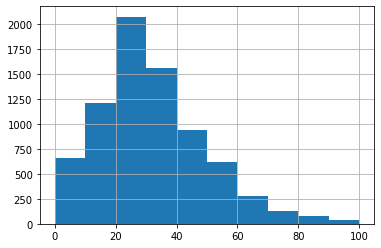

In [7]:


labels['real_age'].hist(bins=10, range=(0, 100))

plt.show()

### Findings

- There are 7591 image files
- The age of people ranges from 1 -100 years old
- The average age is 29 years old
- Most of the people are aged between 20 and 30 years old.
- There are fewer people with the age 60 and above

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [8]:
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [9]:
def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1./255)
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)
 
    return train_gen_flow

In [10]:
def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255)
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)
 
    return test_gen_flow

In [11]:
def create_model(input_shape):
    backbone = ResNet50(weights='imagenet', 
                        input_shape=input_shape,
                        include_top=False)
 
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))
 
    optimizer = Adam(lr=0.0005)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
 
    return model

In [12]:
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):
 
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)
 
    model.fit(train_data, 
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)
 
    return model

### Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [13]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')
        
    


### Output

Placing the output from the GPU platform as an Markdown cell here.

2022-05-08 23:00:41.671588: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-05-08 23:00:41.673283: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-05-08 23:00:42.894304: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-08 23:00:43.582241: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-08 23:00:43.582328: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:43.582361: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:43.584295: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-08 23:00:43.584690: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-08 23:00:43.587076: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-05-08 23:00:43.588245: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-05-08 23:00:43.588320: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-08 23:00:43.592613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-05-08 23:00:43.592970: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-05-08 23:00:43.599839: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2022-05-08 23:00:43.600424: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3970f30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-08 23:00:43.600454: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-08 23:00:43.743401: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x46b84b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-05-08 23:00:43.743442: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-05-08 23:00:43.745857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-08 23:00:43.745925: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:43.745935: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:43.745962: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-08 23:00:43.745972: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-08 23:00:43.745981: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-05-08 23:00:43.745989: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-05-08 23:00:43.745997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-08 23:00:43.750506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-05-08 23:00:43.750589: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:44.063725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-08 23:00:44.063778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-05-08 23:00:44.063787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-05-08 23:00:44.068598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2022-05-08 23:00:54.906195: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:55.231224: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 98s - loss: 207.6220 - mae: 10.8524 - val_loss: 323.3346 - val_mae: 13.3272
Epoch 2/20
356/356 - 38s - loss: 136.3556 - mae: 8.9599 - val_loss: 278.4501 - val_mae: 13.5151
Epoch 3/20
356/356 - 38s - loss: 110.3684 - mae: 8.0395 - val_loss: 163.0583 - val_mae: 9.2809
Epoch 4/20
356/356 - 38s - loss: 93.5072 - mae: 7.3856 - val_loss: 206.2468 - val_mae: 10.3820
Epoch 5/20
356/356 - 37s - loss: 80.6262 - mae: 6.8823 - val_loss: 151.8503 - val_mae: 9.6981
Epoch 6/20
356/356 - 38s - loss: 63.5863 - mae: 6.0973 - val_loss: 165.6288 - val_mae: 9.8098
Epoch 7/20
356/356 - 38s - loss: 53.7330 - mae: 5.6430 - val_loss: 122.0895 - val_mae: 8.3484
Epoch 8/20
356/356 - 37s - loss: 45.0534 - mae: 5.1247 - val_loss: 90.8101 - val_mae: 7.1414
Epoch 9/20
356/356 - 38s - loss: 42.9235 - mae: 4.9944 - val_loss: 162.1831 - val_mae: 9.9839
Epoch 10/20
356/356 - 38s - loss: 36.1889 - mae: 4.6620 - val_loss: 118.7158 - val_mae: 8.0478
Epoch 11/20
356/356 - 37s - loss: 29.1866 - mae: 4.2138 - val_loss: 106.7834 - val_mae: 7.5927
Epoch 12/20
356/356 - 38s - loss: 27.5572 - mae: 4.0434 - val_loss: 104.3532 - val_mae: 7.8868
Epoch 13/20
356/356 - 38s - loss: 26.1322 - mae: 3.9356 - val_loss: 88.4752 - val_mae: 7.0884
Epoch 14/20
356/356 - 38s - loss: 25.7657 - mae: 3.9169 - val_loss: 94.0407 - val_mae: 7.4884
Epoch 15/20
356/356 - 38s - loss: 22.8202 - mae: 3.6662 - val_loss: 84.8546 - val_mae: 6.8775
Epoch 16/20
356/356 - 38s - loss: 20.9390 - mae: 3.5406 - val_loss: 83.4330 - val_mae: 6.7209
Epoch 17/20
356/356 - 38s - loss: 19.6756 - mae: 3.4232 - val_loss: 78.9828 - val_mae: 6.5279
Epoch 18/20
356/356 - 37s - loss: 17.9286 - mae: 3.2583 - val_loss: 79.4942 - val_mae: 6.6038
Epoch 19/20
356/356 - 38s - loss: 17.2759 - mae: 3.1923 - val_loss: 82.4948 - val_mae: 6.7939
Epoch 20/20
356/356 - 38s - loss: 17.4754 - mae: 3.2148 - val_loss: 80.1763 - val_mae: 6.8733
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 80.1763 - mae: 6.8733
Test MAE: 6.8733
2022-05-08 23:00:41.671588: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer.so.6
2022-05-08 23:00:41.673283: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libnvinfer_plugin.so.6
Using TensorFlow backend.
Found 5694 validated image filenames.
Found 1897 validated image filenames.
2022-05-08 23:00:42.894304: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-05-08 23:00:43.582241: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-08 23:00:43.582328: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:43.582361: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:43.584295: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-08 23:00:43.584690: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-08 23:00:43.587076: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-05-08 23:00:43.588245: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-05-08 23:00:43.588320: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-08 23:00:43.592613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-05-08 23:00:43.592970: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2022-05-08 23:00:43.599839: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2099990000 Hz
2022-05-08 23:00:43.600424: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x3970f30 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-05-08 23:00:43.600454: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2022-05-08 23:00:43.743401: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x46b84b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-05-08 23:00:43.743442: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2022-05-08 23:00:43.745857: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1555] Found device 0 with properties: 
pciBusID: 0000:8b:00.0 name: Tesla V100-SXM2-32GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 31.75GiB deviceMemoryBandwidth: 836.37GiB/s
2022-05-08 23:00:43.745925: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:43.745935: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:43.745962: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2022-05-08 23:00:43.745972: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2022-05-08 23:00:43.745981: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolver.so.10
2022-05-08 23:00:43.745989: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusparse.so.10
2022-05-08 23:00:43.745997: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
2022-05-08 23:00:43.750506: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1697] Adding visible gpu devices: 0
2022-05-08 23:00:43.750589: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-05-08 23:00:44.063725: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1096] Device interconnect StreamExecutor with strength 1 edge matrix:
2022-05-08 23:00:44.063778: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1102]      0 
2022-05-08 23:00:44.063787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1115] 0:   N 
2022-05-08 23:00:44.068598: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1241] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30509 MB memory) -> physical GPU (device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:8b:00.0, compute capability: 7.0)
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 356 steps, validate for 119 steps
Epoch 1/20
2022-05-08 23:00:54.906195: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-05-08 23:00:55.231224: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
356/356 - 98s - loss: 207.6220 - mae: 10.8524 - val_loss: 323.3346 - val_mae: 13.3272
Epoch 2/20
356/356 - 38s - loss: 136.3556 - mae: 8.9599 - val_loss: 278.4501 - val_mae: 13.5151
Epoch 3/20
356/356 - 38s - loss: 110.3684 - mae: 8.0395 - val_loss: 163.0583 - val_mae: 9.2809
Epoch 4/20
356/356 - 38s - loss: 93.5072 - mae: 7.3856 - val_loss: 206.2468 - val_mae: 10.3820
Epoch 5/20
356/356 - 37s - loss: 80.6262 - mae: 6.8823 - val_loss: 151.8503 - val_mae: 9.6981
Epoch 6/20
356/356 - 38s - loss: 63.5863 - mae: 6.0973 - val_loss: 165.6288 - val_mae: 9.8098
Epoch 7/20
356/356 - 38s - loss: 53.7330 - mae: 5.6430 - val_loss: 122.0895 - val_mae: 8.3484
Epoch 8/20
356/356 - 37s - loss: 45.0534 - mae: 5.1247 - val_loss: 90.8101 - val_mae: 7.1414
Epoch 9/20
356/356 - 38s - loss: 42.9235 - mae: 4.9944 - val_loss: 162.1831 - val_mae: 9.9839
Epoch 10/20
356/356 - 38s - loss: 36.1889 - mae: 4.6620 - val_loss: 118.7158 - val_mae: 8.0478
Epoch 11/20
356/356 - 37s - loss: 29.1866 - mae: 4.2138 - val_loss: 106.7834 - val_mae: 7.5927
Epoch 12/20
356/356 - 38s - loss: 27.5572 - mae: 4.0434 - val_loss: 104.3532 - val_mae: 7.8868
Epoch 13/20
356/356 - 38s - loss: 26.1322 - mae: 3.9356 - val_loss: 88.4752 - val_mae: 7.0884
Epoch 14/20
356/356 - 38s - loss: 25.7657 - mae: 3.9169 - val_loss: 94.0407 - val_mae: 7.4884
Epoch 15/20
356/356 - 38s - loss: 22.8202 - mae: 3.6662 - val_loss: 84.8546 - val_mae: 6.8775
Epoch 16/20
356/356 - 38s - loss: 20.9390 - mae: 3.5406 - val_loss: 83.4330 - val_mae: 6.7209
Epoch 17/20
356/356 - 38s - loss: 19.6756 - mae: 3.4232 - val_loss: 78.9828 - val_mae: 6.5279
Epoch 18/20
356/356 - 37s - loss: 17.9286 - mae: 3.2583 - val_loss: 79.4942 - val_mae: 6.6038
Epoch 19/20
356/356 - 38s - loss: 17.2759 - mae: 3.1923 - val_loss: 82.4948 - val_mae: 6.7939
Epoch 20/20
356/356 - 38s - loss: 17.4754 - mae: 3.2148 - val_loss: 80.1763 - val_mae: 6.8733
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
119/119 - 9s - loss: 80.1763 - mae: 6.8733
Test MAE: 6.8733



## Conclusions

- There are 7591 image files
- The age of people ranges from 1 -100 years old
- The average age is 29 years old
- Most of the people are aged between 20 and 30 years old.
- There are fewer people with the age 60 and above
- We created the model that predicts the age of the customer by scanning the image.
- The ResNet Model has MAE score of 6.87 in the test dataset.

The dataset was downloaded from [ChaLearn Looking at People](https://chalearnlap.cvc.uab.cat/dataset/26/description/)